In [39]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [29]:
con = sqlite3.connect('Data_science_SQL.db')

In [30]:
df = pd.read_csv(r"C:\Users\chr08\Documents\Notebook\Kunskapskontroll 3\ds_salaries.csv")

In [32]:
df['employee_residence'] = df['employee_residence'].replace({"ES": "Spain", "US": "United States", "CA": "Canada", "DE": "Germany", "GB": "Great Britain", "NG": "Nigeria", "IN": "India", "HK": "Hong Kong", "PT": "Portugal", "NL": "Netherlands", "CH": "Switzerland", "CF": "Central African Republic", "FI": "Finland", "UA": "Uruguay", "IE": "Republic of Ireland", "IL": "Israel", "GH": "Ghana", "AT": "Austria", "CO":"Colombia", "SG":"Singapore", "SE": "Sweden", "SI": "Slovenia", "MX": "Mexico", "UZ": "Uzbekistan", "HR": "Croatia", "PL": "Poland", "KW": "Kuwait", "VN": "Vietnam", "CY": "Cypern", "AR": "Argentina", "AM": "Armenia", "BA": "BosniaandHerzegovina", "KE": "Kenya", "GR": "Greece", "MK": "NorthMacedonia", "LV": "Latvia", "IT": "Italy", "MA": "Morocco", "LT": "Lithuania", "BE": "Belgium", "AS": "AmericanSamoa", "IR":"Iran", "HU": "Hungary", "SK": "Slovakia", "CN": "China", "CZ": "CzechRepublic", "CR": "CostaRica", "TR": "Turkey", "DK": "Denmark", "BO": "Bolivia", "PH": "Philippines", "DO": "DominicanRepublic", "EG": "Egypt", "ID": "Indonesia", "AE": "UnitedArabEmirates", "MY": "Malaysia", "JP": "Japan", "EE": "Estonia", "HN": "Honduras", "TN": "Tunisia", "IQ": "Iraq", "BG": "Bulgaria", "JE": "Jordanien", "RS": "Serbia", "NZ": "NewZealand", "MD": "Moldova", "LU": "Luxenbourg", "MT": "Malta"})
 

In [33]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,Spain,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,United States,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,United States,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,Canada,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,Canada,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,United States,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,United States,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,United States,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,United States,100,US,L


In [34]:
df.to_sql('Salaries', con, if_exists='replace')

3755

In [89]:
query = '''SELECT employee_residence, COUNT(*) AS OCCURENCE
FROM salaries
WHERE job_title='Data Scientist'
GROUP BY employee_residence
ORDER BY OCCURENCE DESC
LIMIT 6;'''

In [90]:
df = pd.read_sql(query, con)

In [48]:
df

,employee_residence,OCCURENCE
0,United States,667
1,Great Britain,30
2,Spain,29
3,Canada,22
4,India,19


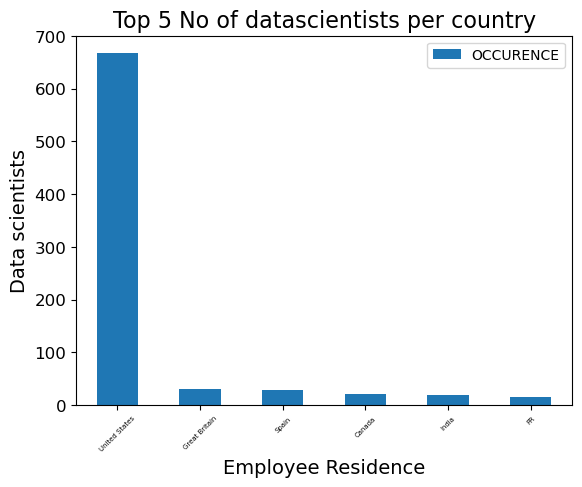

In [92]:
df.plot(kind="bar", x="employee_residence", rot=45)
plt.xticks(fontsize=5)  
plt.yticks(fontsize=12)  
plt.xlabel("Employee Residence", fontsize=14)  
plt.ylabel("Data scientists", fontsize=14)  
plt.title("Top 5 No of datascientists per country", fontsize=16)  
plt.show() 

In [76]:
query = '''SELECT company_location, COUNT(*) AS job_count
FROM Salaries
GROUP BY company_location
ORDER BY job_count DESC
LIMIT 5;'''

In [77]:
df = pd.read_sql(query, con)

In [78]:
df 

,company_location,job_count
0,US,3040
1,GB,172
2,CA,87
3,ES,77
4,IN,58


Text(0.5, 1.0, 'Top 5 No of jobs per country')

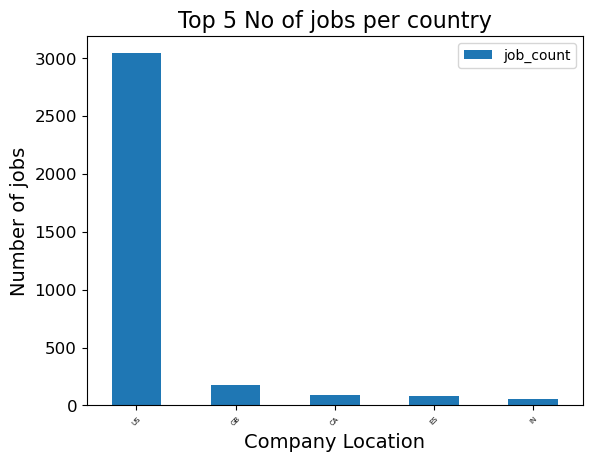

In [85]:
df.plot(kind="bar", x="company_location", rot=45)
plt.xticks(fontsize=5)  
plt.yticks(fontsize=12)  
plt.xlabel("Company Location", fontsize=14)  
plt.ylabel("Number of jobs", fontsize=14)  
plt.title("Top 5 No of jobs per country", fontsize=16)  

In [94]:
query = '''SELECT 
    company_size, 
    AVG(salary_in_usd) AS avg_salary
FROM 
    Salaries
GROUP BY 
    company_size
ORDER BY 
    avg_salary DESC;'''

In [95]:
df = pd.read_sql(query, con)

Text(0.5, 1.0, 'Average salary per size of company')

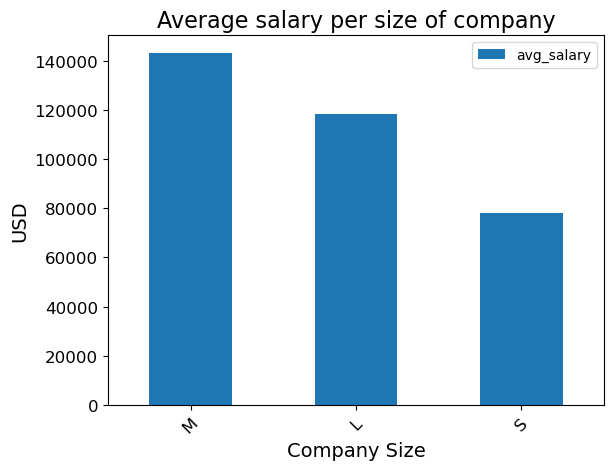

In [96]:
df.plot(kind="bar", x="company_size", rot=45)
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12)  
plt.xlabel("Company Size", fontsize=14)  
plt.ylabel("USD", fontsize=14)  
plt.title("Average salary per size of company", fontsize=16) 